In [25]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)
pd.set_option('display.min_rows', 20)

In [9]:
NUMBER_TORNADOS = 111 #Number of Tornado Events
NUMBER_RANDOM = 110 #Number of Random Events
NUMBER_DAYS = 14 #Number of days of data per Tornado/Event (Max: 57)
FILE_NAME = "all_data.csv" #CSV file that contains the data

In [44]:
df = pd.read_csv(FILE_NAME, parse_dates=['datetime'], usecols=list(range(1, 13)))
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)
df.head()

,datetime,temperature,wind_speed,surface_solar_radiation,relative_humidity,surface_pressure,total_precipitation,city,event_id,latitude,longitude,outcome
0,2017-04-30,12.18,5.76,181,0.60,98916.0,0.03,Birmingham,0,NaN,NaN,0.0
1,2017-05-01,11.01,3.41,191,0.79,99275.0,0.21,Birmingham,0,NaN,NaN,0.0
2,2017-05-02,10.88,3.09,184,0.76,100772.0,0.03,Birmingham,0,NaN,NaN,0.0
3,2017-05-03,9.70,5.75,189,0.72,101186.0,0.00,Birmingham,0,NaN,NaN,0.0
4,2017-05-04,10.98,5.86,248,0.66,101182.0,0.00,Birmingham,0,NaN,NaN,0.0


In [ ]:
sns.relplot(data=df, row='event_id', col='outcome', x='datetime', y='temperature')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36813 entries, 0 to 36812
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   datetime                 36813 non-null  datetime64[ns]
 1   temperature              36813 non-null  float64       
 2   wind_speed               36813 non-null  float64       
 3   surface_solar_radiation  36813 non-null  int64         
 4   relative_humidity        36813 non-null  float64       
 5   surface_pressure         36813 non-null  float64       
 6   total_precipitation      36813 non-null  float64       
 7   city                     13614 non-null  object        
 8   event_id                 36813 non-null  int64         
 9   latitude                 23199 non-null  float64       
 10  longitude                23199 non-null  float64       
 11  outcome                  36813 non-null  float64       
dtypes: datetime64[ns](1), float64(8)

In [46]:
df['day'] = df.groupby('event_id').cumcount()

In [72]:
sel = df[df.day.lt(57)].copy().reset_index(drop=True)

In [73]:
sel.columns

Index(['datetime', 'temperature', 'wind_speed', 'surface_solar_radiation',
       'relative_humidity', 'surface_pressure', 'total_precipitation', 'city',
       'event_id', 'latitude', 'longitude', 'outcome', 'day'],
      dtype='object')

In [104]:
cols = ['temperature', 'wind_speed', 'surface_solar_radiation', 'relative_humidity', 'surface_pressure', 'total_precipitation']
meas_dict = dict()
diff_dict = dict()
for col in cols:
    data = sel.groupby(['day', 'outcome'])[col].mean().reset_index(name=col)
    meas_dict[col] = data.copy()
    res_0 = data[data.outcome.eq(0.0)].reset_index(drop=True)
    res_1 = data[data.outcome.eq(1.0)].reset_index(drop=True)
    diff = res_1[col] - res_0[col]
    diff_dict[col] = diff

In [106]:
data

,day,outcome,total_precipitation
0,0,0.0,0.154798
1,0,1.0,0.049607
2,1,0.0,0.118737
3,1,1.0,0.061548
4,2,0.0,0.114949
5,2,1.0,0.288526
6,3,0.0,0.124949
7,3,1.0,0.287961
8,4,0.0,0.115051
9,4,1.0,0.134152


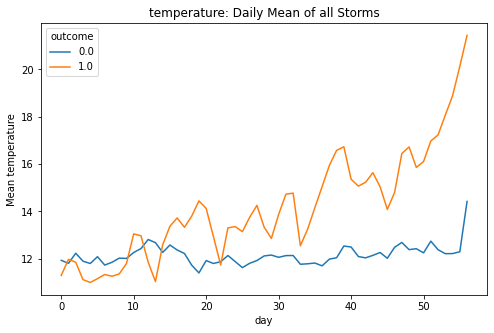

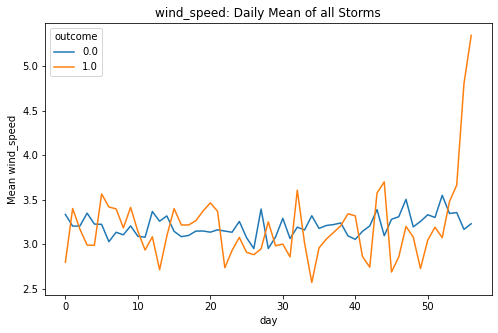

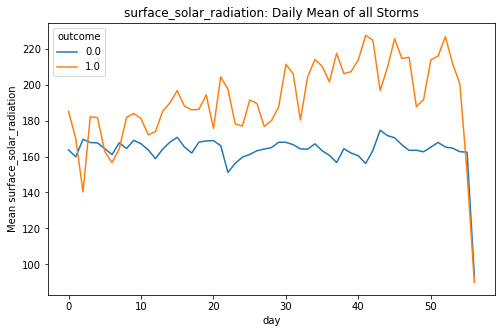

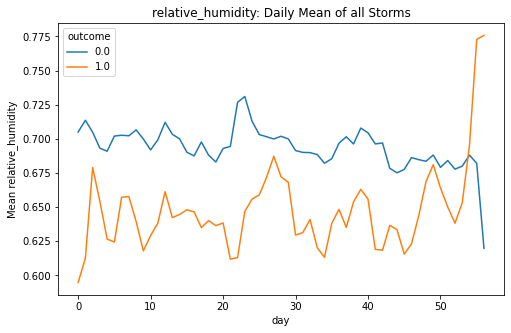

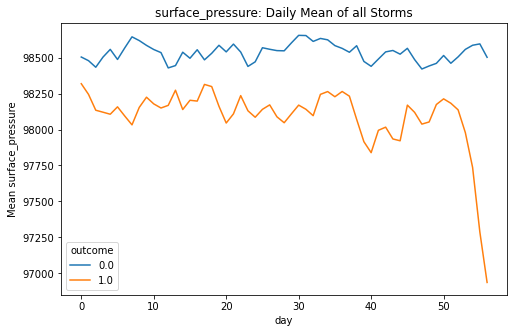

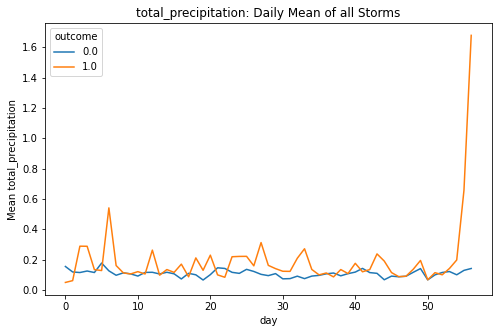

In [92]:
for meas, data in meas_dict.items():
    
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.lineplot(data=data, x='day', y=meas, hue='outcome', ax=ax)
    plt.ylabel(f'Mean {meas}')
    plt.title(f'{meas}: Daily Mean of all Storms')
    plt.show()

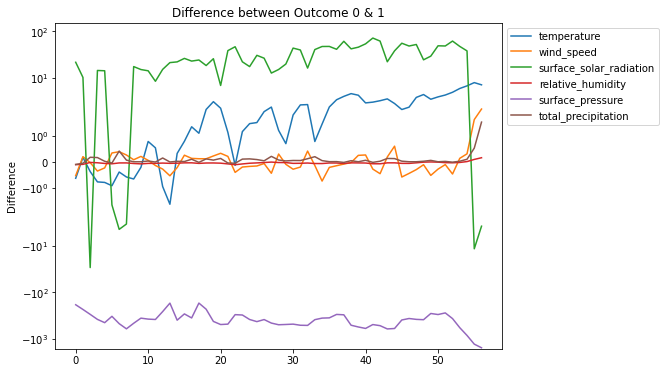

In [99]:
# 1 - 0 
fig, ax = plt.subplots(figsize=(8, 6))
for meas, data in diff_dict.items():
    sns.lineplot(data=data, label=meas)

plt.yscale('symlog')
plt.ylabel('Difference')
plt.title('Difference between Outcome 0 & 1')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [13]:
#df = data.drop(columns=['Unnamed: 0'])
# Get a seto of the event Id's
event_ids = set(df['event_id'].to_numpy())

In [14]:
## Produces a list of dfs
# Each df has the rolling means of the fundamental features
labels = []
list_of_dfs = []
#Use IDs to loop over events 
for i in event_ids:
    # We initialize a df per event
    event_df = pd.DataFrame()
    # Get data for that event 
    event = df.loc[df['event_id'] == i]
    # Exract the label 
    label = event['outcome'].iloc[0]
    # Record the label of the df: 0 or 1
    labels.append(label)
    # Save the dates
#     temp = event['datetime']
    # We only want the features we are processing
    fundamental_features = event.drop(columns=[ 'latitude', 'longitude', 'event_id','outcome', 'Unnamed: 0',], axis = 1)
    # Compute the rolling mean
    event_df = fundamental_features.expanding().mean()  
    # Put the date
#     event_df['Date'] = temp 
    # We want 3 weeks of the last 3 weeks of data
    event_df = event_df.tail(21)
    # We want the last 14 days of this
    event_df = event_df.head(14)
    # Add to list
    list_of_dfs.append(event_df)

In [15]:
def generateRollingAvgFeatures(df):
    ''' Turns a whole data frame into a line of rolling average features
    '''
    all_lists = []
    #Iterate over ever column
    for column in df.columns:
        # Processed list
        # Turn the column of data into a list
        processing_list = df[str(column)].tolist()
        #Loop over the list 
        # Initialize a list to store the 7 processed values 
        processed_list = []
        for i in range(len(processing_list)):
            # Gets the right spots for computing
            if (((i + 1) % 3) == 0):
                feature_point = (processing_list[i] + processing_list[i -1] + processing_list[i-2]) / 3
                processed_list.append(feature_point)
                
        # Here we normalize the list of siumilar data to set up a pattern
        avg = np.average(processed_list)
        std = np.std(processed_list)
        norm = [(float(i) - avg) / std for i in processed_list]
        all_lists += norm
    return all_lists 

In [16]:
# Loop over each Df
processing_data = list_of_dfs.copy()
flag = 0
df = pd.DataFrame()
list_of_lists = []
for df in processing_data:
    if (1):
        #label = getEventType()
        # This will return a row of features for each event 
        x = df
        # TODO:Should this return a list that then becomes a row in the dataframe?
        current = generateRollingAvgFeatures(df)
        list_of_lists.append(current)
        flag +=1

In [24]:
x = list_of_dfs[0]
x
#len(x)

,temperature,wind_speed,surface_solar_radiation,relative_humidity,surface_pressure,total_precipitation
29505,14.311170,3.615000,195.191489,0.746702,100272.617979,0.091170
29506,14.290105,3.648000,195.010526,0.747158,100250.147895,0.097895
29507,14.283021,3.675104,195.062500,0.746458,100243.815104,0.097917
29508,14.284742,3.704124,194.226804,0.747732,100235.085258,0.098351
29509,14.291837,3.709694,194.397959,0.747857,100229.598980,0.097755
29510,14.308788,3.733030,193.303030,0.748788,100228.252323,0.097576
29511,14.322100,3.761500,193.760000,0.748600,100225.348600,0.096800
29512,14.325050,3.778713,193.534653,0.748317,100226.461980,0.096040
29513,14.336078,3.763725,193.156863,0.748627,100230.783627,0.095392
29514,14.375825,3.752524,193.815534,0.748058,100232.167670,0.094563


In [19]:
processed_data = pd.DataFrame(list_of_lists, columns=cols)
# Replace NAN's by 0
processed_data.fillna(0)

,temperature_0,temperature_1,temperature_2,temperature_3,wind_speed_0,wind_speed_1,wind_speed_2,wind_speed_3,surface_solar_radiation_0,surface_solar_radiation_1,...,relative_humidity_2,relative_humidity_3,surface_pressure_0,surface_pressure_1,surface_pressure_2,surface_pressure_3,total_precipitation_0,total_precipitation_1,total_precipitation_2,total_precipitation_3
0,-0.811094,-0.802626,-0.028566,1.642286,-1.580347,-0.130359,0.960832,0.749874,1.573224,-0.339860,...,1.183770,-0.307563,1.691427,-0.556316,-0.871981,-0.263129,-0.120243,1.386575,0.160923,-1.427255
1,1.559945,0.157884,-1.040816,-0.677012,-1.604412,0.253608,0.201477,1.149327,-1.364718,-0.318705,...,-0.370173,-1.172774,-1.092113,1.623389,-0.141604,-0.389673,1.467408,0.065167,-0.188328,-1.344247
2,-0.930007,-1.063403,0.903380,1.090030,-0.784982,-0.724004,1.682152,-0.173165,-0.318728,-0.736645,...,1.189489,-0.329510,0.263240,0.192497,-1.604422,1.148686,1.386606,0.405258,-0.503694,-1.288170
3,1.164053,0.713819,-0.507518,-1.370354,-1.042504,-0.919822,0.714937,1.247389,0.812973,0.699648,...,-1.236731,-0.706079,1.009076,0.911362,-0.568337,-1.352101,1.490620,0.014063,-1.320593,-0.184090
4,-1.205134,-0.689736,0.575513,1.319357,-1.075751,-0.882344,1.250306,0.707789,-1.127028,-0.651713,...,0.332980,-1.699733,0.225381,-0.172031,-1.426351,1.373001,1.393579,0.364237,-0.442840,-1.314976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,-1.135329,-0.651516,0.305994,1.480852,1.194181,0.627897,-0.401288,-1.420790,-0.930282,-0.842734,...,0.637254,1.212856,-1.124100,-0.755366,0.492729,1.386737,1.018721,0.681992,-0.125483,-1.575230
601,-1.615984,-0.039769,0.918034,0.737718,1.040571,0.876357,-0.563559,-1.353370,-1.510622,-0.294739,...,-0.825420,-1.120293,1.045813,-0.982336,-1.016440,0.952963,1.550938,0.192842,-1.007936,-0.735844
602,1.153023,0.641874,-0.328367,-1.466530,-1.549873,-0.026050,0.366389,1.209534,1.499778,0.251837,...,0.659203,0.876705,0.829241,-1.570535,-0.163684,0.904978,-1.721735,0.751678,0.477801,0.492256
603,-1.559625,-0.113002,0.557065,1.115562,0.938276,0.733322,-0.066137,-1.605461,0.324450,1.470636,...,0.415522,1.426122,-1.617299,0.237914,0.255878,1.123507,-1.131246,-0.859048,0.966107,1.024186


In [19]:
processed_data = pd.DataFrame(list_of_lists, columns=cols)
# Replace NAN's by 0
processed_data.fillna(0)

,temperature_0,temperature_1,temperature_2,temperature_3,wind_speed_0,wind_speed_1,wind_speed_2,wind_speed_3,surface_solar_radiation_0,surface_solar_radiation_1,...,relative_humidity_2,relative_humidity_3,surface_pressure_0,surface_pressure_1,surface_pressure_2,surface_pressure_3,total_precipitation_0,total_precipitation_1,total_precipitation_2,total_precipitation_3
0,-0.811094,-0.802626,-0.028566,1.642286,-1.580347,-0.130359,0.960832,0.749874,1.573224,-0.339860,...,1.183770,-0.307563,1.691427,-0.556316,-0.871981,-0.263129,-0.120243,1.386575,0.160923,-1.427255
1,1.559945,0.157884,-1.040816,-0.677012,-1.604412,0.253608,0.201477,1.149327,-1.364718,-0.318705,...,-0.370173,-1.172774,-1.092113,1.623389,-0.141604,-0.389673,1.467408,0.065167,-0.188328,-1.344247
2,-0.930007,-1.063403,0.903380,1.090030,-0.784982,-0.724004,1.682152,-0.173165,-0.318728,-0.736645,...,1.189489,-0.329510,0.263240,0.192497,-1.604422,1.148686,1.386606,0.405258,-0.503694,-1.288170
3,1.164053,0.713819,-0.507518,-1.370354,-1.042504,-0.919822,0.714937,1.247389,0.812973,0.699648,...,-1.236731,-0.706079,1.009076,0.911362,-0.568337,-1.352101,1.490620,0.014063,-1.320593,-0.184090
4,-1.205134,-0.689736,0.575513,1.319357,-1.075751,-0.882344,1.250306,0.707789,-1.127028,-0.651713,...,0.332980,-1.699733,0.225381,-0.172031,-1.426351,1.373001,1.393579,0.364237,-0.442840,-1.314976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,-1.135329,-0.651516,0.305994,1.480852,1.194181,0.627897,-0.401288,-1.420790,-0.930282,-0.842734,...,0.637254,1.212856,-1.124100,-0.755366,0.492729,1.386737,1.018721,0.681992,-0.125483,-1.575230
601,-1.615984,-0.039769,0.918034,0.737718,1.040571,0.876357,-0.563559,-1.353370,-1.510622,-0.294739,...,-0.825420,-1.120293,1.045813,-0.982336,-1.016440,0.952963,1.550938,0.192842,-1.007936,-0.735844
602,1.153023,0.641874,-0.328367,-1.466530,-1.549873,-0.026050,0.366389,1.209534,1.499778,0.251837,...,0.659203,0.876705,0.829241,-1.570535,-0.163684,0.904978,-1.721735,0.751678,0.477801,0.492256
603,-1.559625,-0.113002,0.557065,1.115562,0.938276,0.733322,-0.066137,-1.605461,0.324450,1.470636,...,0.415522,1.426122,-1.617299,0.237914,0.255878,1.123507,-1.131246,-0.859048,0.966107,1.024186


In [18]:
nums = range(4)
cols = [f'{v}_{i}' for v in df.columns[:] for i in nums]

In [19]:
processed_data = pd.DataFrame(list_of_lists, columns=cols)
# Replace NAN's by 0
processed_data.fillna(0)

,temperature_0,temperature_1,temperature_2,temperature_3,wind_speed_0,wind_speed_1,wind_speed_2,wind_speed_3,surface_solar_radiation_0,surface_solar_radiation_1,...,relative_humidity_2,relative_humidity_3,surface_pressure_0,surface_pressure_1,surface_pressure_2,surface_pressure_3,total_precipitation_0,total_precipitation_1,total_precipitation_2,total_precipitation_3
0,-0.811094,-0.802626,-0.028566,1.642286,-1.580347,-0.130359,0.960832,0.749874,1.573224,-0.339860,...,1.183770,-0.307563,1.691427,-0.556316,-0.871981,-0.263129,-0.120243,1.386575,0.160923,-1.427255
1,1.559945,0.157884,-1.040816,-0.677012,-1.604412,0.253608,0.201477,1.149327,-1.364718,-0.318705,...,-0.370173,-1.172774,-1.092113,1.623389,-0.141604,-0.389673,1.467408,0.065167,-0.188328,-1.344247
2,-0.930007,-1.063403,0.903380,1.090030,-0.784982,-0.724004,1.682152,-0.173165,-0.318728,-0.736645,...,1.189489,-0.329510,0.263240,0.192497,-1.604422,1.148686,1.386606,0.405258,-0.503694,-1.288170
3,1.164053,0.713819,-0.507518,-1.370354,-1.042504,-0.919822,0.714937,1.247389,0.812973,0.699648,...,-1.236731,-0.706079,1.009076,0.911362,-0.568337,-1.352101,1.490620,0.014063,-1.320593,-0.184090
4,-1.205134,-0.689736,0.575513,1.319357,-1.075751,-0.882344,1.250306,0.707789,-1.127028,-0.651713,...,0.332980,-1.699733,0.225381,-0.172031,-1.426351,1.373001,1.393579,0.364237,-0.442840,-1.314976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,-1.135329,-0.651516,0.305994,1.480852,1.194181,0.627897,-0.401288,-1.420790,-0.930282,-0.842734,...,0.637254,1.212856,-1.124100,-0.755366,0.492729,1.386737,1.018721,0.681992,-0.125483,-1.575230
601,-1.615984,-0.039769,0.918034,0.737718,1.040571,0.876357,-0.563559,-1.353370,-1.510622,-0.294739,...,-0.825420,-1.120293,1.045813,-0.982336,-1.016440,0.952963,1.550938,0.192842,-1.007936,-0.735844
602,1.153023,0.641874,-0.328367,-1.466530,-1.549873,-0.026050,0.366389,1.209534,1.499778,0.251837,...,0.659203,0.876705,0.829241,-1.570535,-0.163684,0.904978,-1.721735,0.751678,0.477801,0.492256
603,-1.559625,-0.113002,0.557065,1.115562,0.938276,0.733322,-0.066137,-1.605461,0.324450,1.470636,...,0.415522,1.426122,-1.617299,0.237914,0.255878,1.123507,-1.131246,-0.859048,0.966107,1.024186
